In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,5:6] #Leptin
X2 = dataset[:,6:7] #Adiponectin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,7:8] #Resistin
X5 = dataset[:,2:3] #Glucose
X6 = dataset[:,4:5] #HOMA
X7 = dataset[:,8:9] #MCP.1
X8 = dataset[:,3:4] #Insulin
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)
X5 = normalization(X5)
X6 = normalization(X6)
X7 = normalization(X7)
X8 = normalization(X8)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')
input_layer_X5 = keras.layers.Input(shape=(1, ), name='input_layer_X5')
input_layer_X6 = keras.layers.Input(shape=(1, ), name='input_layer_X6')
input_layer_X7 = keras.layers.Input(shape=(1, ), name='input_layer_X7')
input_layer_X8 = keras.layers.Input(shape=(1, ), name='input_layer_X8')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6, input_layer_X7, input_layer_X8], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6, input_layer_X7, input_layer_X8], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4, X5, X6, X7, X8], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 9ms/step - loss: 0.7035 - acc: 0.5652 - auc_1: 0.5543 - val_loss: 0.6541 - val_acc: 0.7083 - val_auc_1: 0.6607
Epoch 2/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6646 - acc: 0.6848 - auc_1: 0.6626 - val_loss: 0.6233 - val_acc: 0.7500 - val_auc_1: 0.7357
Epoch 3/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6452 - acc: 0.6522 - auc_1: 0.6926 - val_loss: 0.6019 - val_acc: 0.7500 - val_auc_1: 0.7500
Epoch 4/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6260 - acc: 0.6848 - auc_1: 0.7110 - val_loss: 0.5809 - val_acc: 0.6667 - val_auc_1: 0.7536
Epoch 5/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6094 - acc: 0.6522 - auc_1: 0.7210 - val_loss: 0.5556 - val_acc: 0.7500 - val_auc_1: 0.7929
Epoch 6/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5985 - acc: 0.6630 - auc_1: 0.7331 - val_loss:

92/92 [==============================] - 0s 3ms/step - loss: 0.4099 - acc: 0.8043 - auc_1: 0.8950 - val_loss: 0.5603 - val_acc: 0.7083 - val_auc_1: 0.8714
Epoch 50/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4083 - acc: 0.7717 - auc_1: 0.8938 - val_loss: 0.4172 - val_acc: 0.8750 - val_auc_1: 0.8929
Epoch 51/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4334 - acc: 0.7717 - auc_1: 0.8740 - val_loss: 0.4793 - val_acc: 0.7500 - val_auc_1: 0.8821
Epoch 52/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4229 - acc: 0.7717 - auc_1: 0.8800 - val_loss: 0.4871 - val_acc: 0.7083 - val_auc_1: 0.8929
Epoch 53/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4192 - acc: 0.7935 - auc_1: 0.8802 - val_loss: 0.4258 - val_acc: 0.7500 - val_auc_1: 0.9107
Epoch 54/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4204 - acc: 0.7500 - auc_1: 0.8812 - val_loss: 0.4199 - val_acc: 0.7500 - val_auc_1: 0.9143
Epoch

Epoch 98/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3634 - acc: 0.8370 - auc_1: 0.9148 - val_loss: 0.4062 - val_acc: 0.7917 - val_auc_1: 0.9286
Epoch 99/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3538 - acc: 0.8152 - auc_1: 0.9252 - val_loss: 0.4748 - val_acc: 0.7500 - val_auc_1: 0.8500
Epoch 100/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3666 - acc: 0.8261 - auc_1: 0.9138 - val_loss: 0.4369 - val_acc: 0.7917 - val_auc_1: 0.8714
Epoch 101/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3621 - acc: 0.8043 - auc_1: 0.9145 - val_loss: 0.4700 - val_acc: 0.7500 - val_auc_1: 0.8500
Epoch 102/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3633 - acc: 0.8370 - auc_1: 0.9155 - val_loss: 0.4468 - val_acc: 0.7917 - val_auc_1: 0.8964
Epoch 103/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3545 - acc: 0.8152 - auc_1: 0.9190 - val_loss: 0.4761 - val_acc: 0.7917 - val_au

92/92 [==============================] - 0s 3ms/step - loss: 0.3040 - acc: 0.8696 - auc_1: 0.9414 - val_loss: 0.4460 - val_acc: 0.7500 - val_auc_1: 0.8643
Epoch 147/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2997 - acc: 0.8587 - auc_1: 0.9436 - val_loss: 0.5152 - val_acc: 0.7083 - val_auc_1: 0.7857
Epoch 148/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2846 - acc: 0.8804 - auc_1: 0.9486 - val_loss: 0.4822 - val_acc: 0.7500 - val_auc_1: 0.8643
Epoch 149/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2825 - acc: 0.8804 - auc_1: 0.9526 - val_loss: 0.4899 - val_acc: 0.7083 - val_auc_1: 0.7857
Epoch 150/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2956 - acc: 0.8696 - auc_1: 0.9457 - val_loss: 0.4665 - val_acc: 0.7500 - val_auc_1: 0.8393
Epoch 151/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2846 - acc: 0.8696 - auc_1: 0.9500 - val_loss: 0.4401 - val_acc: 0.7917 - val_auc_1: 0.8643


92/92 [==============================] - 0s 4ms/step - loss: 0.2316 - acc: 0.9130 - auc_1: 0.9683 - val_loss: 0.4918 - val_acc: 0.7083 - val_auc_1: 0.8643
Epoch 195/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2254 - acc: 0.8696 - auc_1: 0.9698 - val_loss: 0.4687 - val_acc: 0.7500 - val_auc_1: 0.8786
Epoch 196/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2272 - acc: 0.9022 - auc_1: 0.9710 - val_loss: 0.4894 - val_acc: 0.6667 - val_auc_1: 0.8286
Epoch 197/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2580 - acc: 0.8478 - auc_1: 0.9588 - val_loss: 0.4506 - val_acc: 0.7500 - val_auc_1: 0.8429
Epoch 198/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2011 - acc: 0.8913 - auc_1: 0.9757 - val_loss: 0.6216 - val_acc: 0.7083 - val_auc_1: 0.7679
Epoch 199/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2397 - acc: 0.9022 - auc_1: 0.9640 - val_loss: 0.5924 - val_acc: 0.7083 - val_auc_1: 0.8679


92/92 [==============================] - 0s 3ms/step - loss: 0.1855 - acc: 0.9130 - auc_1: 0.9807 - val_loss: 0.5574 - val_acc: 0.7083 - val_auc_1: 0.8571
Epoch 243/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1754 - acc: 0.9130 - auc_1: 0.9814 - val_loss: 0.5611 - val_acc: 0.7083 - val_auc_1: 0.8071
Epoch 244/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1933 - acc: 0.9239 - auc_1: 0.9771 - val_loss: 0.4908 - val_acc: 0.6667 - val_auc_1: 0.8143
Epoch 245/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1762 - acc: 0.9239 - auc_1: 0.9798 - val_loss: 0.5332 - val_acc: 0.7500 - val_auc_1: 0.8536
Epoch 246/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1882 - acc: 0.9239 - auc_1: 0.9814 - val_loss: 0.4718 - val_acc: 0.7500 - val_auc_1: 0.8571
Epoch 247/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1911 - acc: 0.9022 - auc_1: 0.9781 - val_loss: 0.5800 - val_acc: 0.6667 - val_auc_1: 0.7929


92/92 [==============================] - 0s 4ms/step - loss: 0.1532 - acc: 0.9457 - auc_1: 0.9852 - val_loss: 0.6485 - val_acc: 0.7083 - val_auc_1: 0.8000
Epoch 291/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1620 - acc: 0.9130 - auc_1: 0.9848 - val_loss: 0.5797 - val_acc: 0.7500 - val_auc_1: 0.8357
Epoch 292/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1637 - acc: 0.9457 - auc_1: 0.9845 - val_loss: 0.5492 - val_acc: 0.7083 - val_auc_1: 0.8571
Epoch 293/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1524 - acc: 0.9348 - auc_1: 0.9867 - val_loss: 0.6591 - val_acc: 0.6667 - val_auc_1: 0.8571
Epoch 294/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1664 - acc: 0.9022 - auc_1: 0.9829 - val_loss: 0.6450 - val_acc: 0.6667 - val_auc_1: 0.8321
Epoch 295/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1359 - acc: 0.9348 - auc_1: 0.9905 - val_loss: 0.5872 - val_acc: 0.7083 - val_auc_1: 0.8357


92/92 [==============================] - 0s 4ms/step - loss: 0.1452 - acc: 0.9457 - auc_1: 0.9888 - val_loss: 0.5253 - val_acc: 0.7500 - val_auc_1: 0.8643
Epoch 339/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2138 - acc: 0.9022 - auc_1: 0.9738 - val_loss: 0.5642 - val_acc: 0.6667 - val_auc_1: 0.7893
Epoch 340/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1461 - acc: 0.9239 - auc_1: 0.9867 - val_loss: 0.7652 - val_acc: 0.6667 - val_auc_1: 0.8107
Epoch 341/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1428 - acc: 0.9239 - auc_1: 0.9888 - val_loss: 0.6373 - val_acc: 0.7083 - val_auc_1: 0.8393
Epoch 342/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1237 - acc: 0.9239 - auc_1: 0.9912 - val_loss: 0.6473 - val_acc: 0.7083 - val_auc_1: 0.8429
Epoch 343/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1236 - acc: 0.9457 - auc_1: 0.9919 - val_loss: 0.6172 - val_acc: 0.7083 - val_auc_1: 0.8357


92/92 [==============================] - 0s 4ms/step - loss: 0.0947 - acc: 0.9674 - auc_1: 0.9969 - val_loss: 0.7136 - val_acc: 0.7500 - val_auc_1: 0.8036
Epoch 387/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1077 - acc: 0.9565 - auc_1: 0.9933 - val_loss: 0.7814 - val_acc: 0.7500 - val_auc_1: 0.7893
Epoch 388/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1052 - acc: 0.9565 - auc_1: 0.9938 - val_loss: 0.8243 - val_acc: 0.7083 - val_auc_1: 0.7821
Epoch 389/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0973 - acc: 0.9674 - auc_1: 0.9952 - val_loss: 0.9260 - val_acc: 0.6250 - val_auc_1: 0.7857
Epoch 390/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1029 - acc: 0.9565 - auc_1: 0.9952 - val_loss: 0.6333 - val_acc: 0.6667 - val_auc_1: 0.8036
Epoch 391/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1138 - acc: 0.9457 - auc_1: 0.9919 - val_loss: 0.7645 - val_acc: 0.6250 - val_auc_1: 0.7964


92/92 [==============================] - 0s 5ms/step - loss: 0.0636 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 0.7931 - val_acc: 0.7083 - val_auc_1: 0.8179
Epoch 435/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0515 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 0.9110 - val_acc: 0.7083 - val_auc_1: 0.7857
Epoch 436/700
92/92 [==============================] - 1s 6ms/step - loss: 0.0659 - acc: 0.9783 - auc_1: 0.9967 - val_loss: 0.9741 - val_acc: 0.7083 - val_auc_1: 0.7714
Epoch 437/700
92/92 [==============================] - 1s 6ms/step - loss: 0.0575 - acc: 0.9783 - auc_1: 0.9986 - val_loss: 1.0227 - val_acc: 0.7083 - val_auc_1: 0.7893
Epoch 438/700
92/92 [==============================] - 1s 8ms/step - loss: 0.0652 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 0.7306 - val_acc: 0.7500 - val_auc_1: 0.8357
Epoch 439/700
92/92 [==============================] - ETA: 0s - loss: 0.0676 - acc: 0.9540 - auc_1: 0.997 - 1s 7ms/step - loss: 0.0648 - acc: 0.9565 - auc_1: 0.9981 - v

Epoch 482/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0156 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2287 - val_acc: 0.7083 - val_auc_1: 0.7679
Epoch 483/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0174 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2291 - val_acc: 0.7083 - val_auc_1: 0.7393
Epoch 484/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0161 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3130 - val_acc: 0.7083 - val_auc_1: 0.7571
Epoch 485/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0171 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1820 - val_acc: 0.6667 - val_auc_1: 0.7643
Epoch 486/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0161 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2649 - val_acc: 0.7083 - val_auc_1: 0.7357
Epoch 487/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0211 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4911 - val_acc: 0.6667 - val_

92/92 [==============================] - 0s 5ms/step - loss: 0.0222 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4687 - val_acc: 0.6667 - val_auc_1: 0.7429
Epoch 531/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0062 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3747 - val_acc: 0.6667 - val_auc_1: 0.7571
Epoch 532/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0062 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3552 - val_acc: 0.6667 - val_auc_1: 0.7607
Epoch 533/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0058 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3603 - val_acc: 0.7083 - val_auc_1: 0.7571
Epoch 534/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3313 - val_acc: 0.6667 - val_auc_1: 0.7679
Epoch 535/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0054 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3245 - val_acc: 0.7500 - val_auc_1: 0.7643


92/92 [==============================] - 0s 4ms/step - loss: 0.0155 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 1.1214 - val_acc: 0.7500 - val_auc_1: 0.7857
Epoch 579/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0044 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1131 - val_acc: 0.7500 - val_auc_1: 0.7893
Epoch 580/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0042 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1164 - val_acc: 0.7500 - val_auc_1: 0.7821
Epoch 581/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1050 - val_acc: 0.7500 - val_auc_1: 0.7857
Epoch 582/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0034 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1224 - val_acc: 0.7500 - val_auc_1: 0.7857
Epoch 583/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0032 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1201 - val_acc: 0.7500 - val_auc_1: 0.7857


92/92 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4411 - val_acc: 0.7500 - val_auc_1: 0.7679
Epoch 627/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4701 - val_acc: 0.7500 - val_auc_1: 0.7750
Epoch 628/700
92/92 [==============================] - 0s 4ms/step - loss: 9.5738e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4516 - val_acc: 0.7500 - val_auc_1: 0.7607
Epoch 629/700
92/92 [==============================] - 0s 4ms/step - loss: 9.6017e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4362 - val_acc: 0.7500 - val_auc_1: 0.7893
Epoch 630/700
92/92 [==============================] - 0s 4ms/step - loss: 9.3109e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4642 - val_acc: 0.7500 - val_auc_1: 0.7643
Epoch 631/700
92/92 [==============================] - 0s 4ms/step - loss: 9.4726e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4803 - val_acc: 0.7500 - va

Epoch 674/700
92/92 [==============================] - 0s 4ms/step - loss: 6.6887e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3432 - val_acc: 0.7500 - val_auc_1: 0.7964
Epoch 675/700
92/92 [==============================] - 0s 4ms/step - loss: 6.6598e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3484 - val_acc: 0.7500 - val_auc_1: 0.7964
Epoch 676/700
92/92 [==============================] - 0s 4ms/step - loss: 6.4711e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3405 - val_acc: 0.7500 - val_auc_1: 0.7964
Epoch 677/700
92/92 [==============================] - 0s 4ms/step - loss: 6.4545e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3497 - val_acc: 0.7500 - val_auc_1: 0.7964
Epoch 678/700
92/92 [==============================] - 0s 4ms/step - loss: 6.1842e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3652 - val_acc: 0.7500 - val_auc_1: 0.7964
Epoch 679/700
92/92 [==============================] - 0s 4ms/step - loss: 6.2444e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3641 

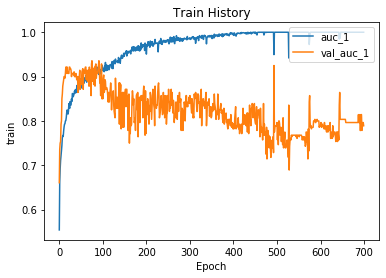

[array([[-0.11047665,  2.0753841 ,  0.03018923, -1.5484679 ,  0.17149904,
        -0.07472192, -0.59424573,  0.65693545, -0.39313248],
       [-0.37748563, -0.62340385, -0.25698486, -0.16568704,  1.1133446 ,
        -0.6710895 ,  2.790142  , -1.5015608 ,  0.08242103],
       [ 0.46166742, -0.07402916,  1.1335173 ,  0.5076177 , -0.6003938 ,
        -0.44103456,  0.16447042, -0.6040523 , -0.0946009 ],
       [-1.9799584 ,  1.8385764 , -2.2508314 ,  2.589592  , -2.4997993 ,
         2.1759813 , -0.00947241, -0.22048865,  0.967752  ],
       [-1.3375978 ,  0.08171265, -0.98298496, -0.69924927, -1.0858915 ,
         1.379075  , -0.2112374 , -0.8188787 ,  1.5200362 ],
       [ 0.6818679 , -0.3549123 , -0.38143793,  2.1019487 ,  0.5173405 ,
        -1.2119459 , -0.09994353,  0.57335055,  1.4363058 ],
       [ 0.56871   , -0.39957538, -0.3564451 ,  0.6329253 , -0.1694097 ,
         0.28638726, -0.9833265 , -0.5724897 , -0.3539923 ],
       [ 1.3435671 , -0.06477709, -0.03414082,  1.7671821 ,  

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4, X5, X6, X7, X8])
print(predictions)

[[4.53608867e-04]
 [9.99912858e-01]
 [9.99773920e-01]
 [1.81082112e-04]
 [6.54138043e-04]
 [9.99995589e-01]
 [9.99875188e-01]
 [1.00000000e+00]
 [9.98507440e-01]
 [9.99433935e-01]
 [2.06841669e-05]
 [9.95177470e-06]
 [9.99999642e-01]
 [2.77314225e-08]
 [9.07506852e-04]
 [1.00000000e+00]
 [1.00277221e-05]
 [9.99829531e-01]
 [9.99997020e-01]
 [9.99986053e-01]
 [1.05765004e-07]
 [4.04327061e-09]
 [1.17274548e-03]
 [9.99909401e-01]
 [9.99858379e-01]
 [9.99998450e-01]
 [9.99985099e-01]
 [9.99998331e-01]
 [1.95409739e-05]
 [1.00000000e+00]
 [6.01720940e-09]
 [7.22129198e-06]
 [4.05679430e-06]
 [5.24513634e-05]
 [1.46580144e-08]
 [9.99999762e-01]
 [1.00000000e+00]
 [9.98088658e-01]
 [9.99992609e-01]
 [9.99995112e-01]
 [9.99548137e-01]
 [1.00000000e+00]
 [1.23533956e-03]
 [6.10768388e-04]
 [4.32194611e-07]
 [9.97468829e-01]
 [9.97586250e-01]
 [9.99656439e-01]
 [9.99847054e-01]
 [1.00091956e-05]
 [1.43463126e-06]
 [9.99135673e-01]
 [1.33401099e-05]
 [5.82997163e-05]
 [7.68588507e-05]
 [4.635710